In [9]:
import pandas as pd
import dtale
import seaborn as sns

In [3]:
df=pd.read_csv('/FyntraCustomerData.csv')

In [4]:
df.describe()

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


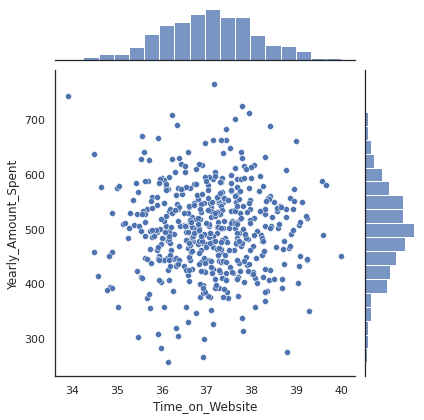

In [22]:
#Time on Website and Yearly Amount Spent 
#Compute --Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns.  Is there a correlation?
df_Time_website_Amount = df.filter(
    ["Time_on_Website", "Yearly_Amount_Spent"])

sns.set(style="white", color_codes=True)
sns.jointplot(x="Time_on_Website",
              y="Yearly_Amount_Spent", data=df_Time_website_Amount)




<AxesSubplot: >

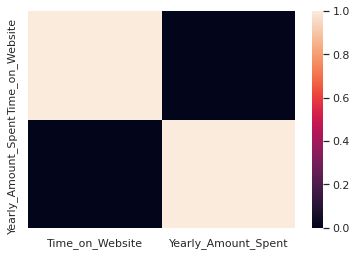

In [23]:
# sns.jointplot(data=df_Time_website_Amount, x=df["Time_on_Website"], y=df["Yearly_Amount_Spent"])

# Is there a correlation? : Both have strong correlation
coff_Time_Amount = df_Time_website_Amount.corr()
sns.heatmap(coff_Time_Amount)

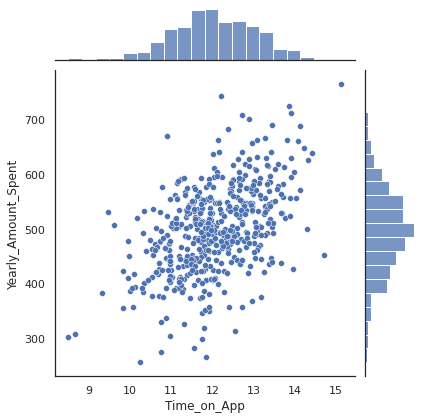

In [19]:
#Compute –Do the same as above but now with Time on App and Yearly Amount Spent. Is this correlation stronger than 1stOne?

df_Time_App_Amount = df.filter(
    ["Time_on_App", "Yearly_Amount_Spent"])

sns.set(style="white", color_codes=True)
sns.jointplot(x="Time_on_App",
              y="Yearly_Amount_Spent", data=df_Time_App_Amount)


<AxesSubplot: >

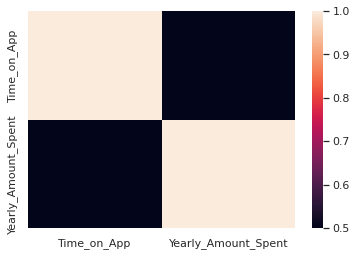

In [21]:

# Is there a correlation? : Both have strong correlation
coff_Time_Amount1 = df_Time_App_Amount.corr()
sns.heatmap(coff_Time_Amount)

In [8]:
dtale.show(df)

http://702627bdc078:40000/dtale/main/2

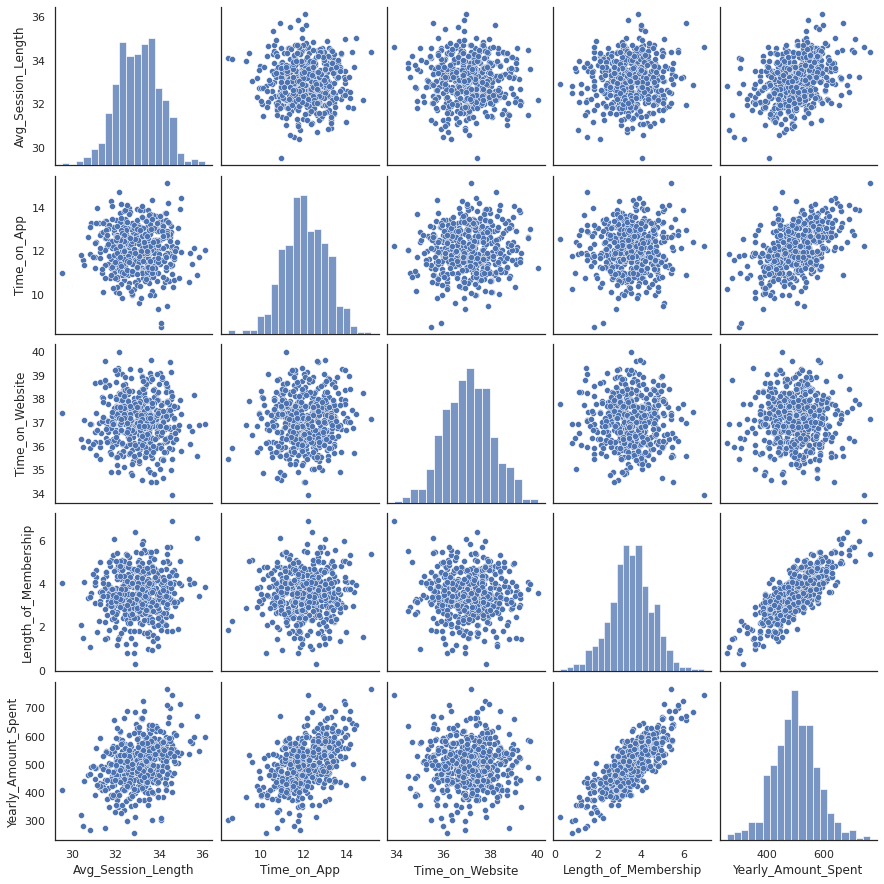

In [24]:
#Compute --Explore types of relationships across the entire data set using pairplot . Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?

sns.pairplot(df)

In [27]:
#Compute –Create linear model plot of Length of Membership and Yearly Amount Spent. Does the data fits well in linear plot?
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model_lr=LinearRegression()


In [49]:
X=df['Length_of_Membership']
Y=df['Yearly_Amount_Spent']



KeyError: ignored

In [29]:
train_x, test_x, train_y, test_y = train_test_split(
    X, Y, random_state=85, test_size=0.3)

In [31]:
model_lr.fit(pd.DataFrame(train_x),train_y)

LinearRegression()

In [33]:
test_y

412    444.053827
266    554.003093
309    302.189548
212    536.130897
105    497.513683
          ...    
495    573.847438
32     588.712605
285    471.602884
395    484.876965
410    608.271817
Name: Yearly_Amount_Spent, Length: 150, dtype: float64

In [ ]:
#Compute –Train and Test the data and answer multiple questions --What is the use of random_state=85?

#random state parameter will generate set of data which will be [permanent ]fixed when train_test_split is called,
#ex==  Anyone who will pass this random_state as 85 for this dataset values fr train_x, test_x and train_y, test_y will be same


In [34]:
pred_y=model_lr.predict(pd.DataFrame(test_x))

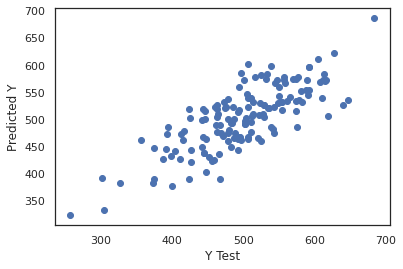

MAE: 35.98780598763131
MSE: 2005.0084500660193
RMSE: 44.777320711114676
44.777320711114676


In [40]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(test_y, pred_y)

plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

from sklearn.metrics import mean_squared_error
from math import sqrt
# 7.What is the value of Root Mean Squared Error?
rms = sqrt(mean_squared_error(test_y, pred_y))

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(test_y, pred_y))
print('MSE:', metrics.mean_squared_error(test_y, pred_y))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, pred_y)))
print(rms)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



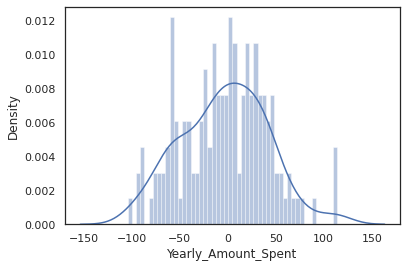

In [38]:
sns.distplot((test_y-pred_y),bins=50);